# **AI Research Helper Chatbot**



#🚀Introduction
The AI Research Helper Chatbot is a Streamlit-powered chatbot designed to assist users in discovering relevant research papers. This chatbot was developed by Team 3 for CSE 6550: Software Engineering Concepts at California State University, San Bernardino (CSUSB).

In this notebook, we show how the chatbot uses retrieval-augmented generation (RAG) to answer research-related questions from this website https://paperswithcode.com/sota. It combines FAISS for finding relevant information, SentenceTransformers for understanding text, and LangChain for smooth conversations.

# Table of Contents

1. 📦 [Step 1: Installing Required Packages](#Step-1)  
2. 📚 [Step 2: Importing Libraries](#Step-2)
3. 🔑 [Step 3: Accessing data from Google Drive](#Step-3)
4. 🕷️ [Step 4: Defining the Scrapy Spider for Data](#Step-4)
5. 🕸️ [Step 5: Running the Scrapy Spider to Collect Data](#Step-5)
6. 🔑 [Step 6: Setting up API key](#Step-6)
7. 🤖 [Step 7: Initializing Chat Model and Session State](#Step-7)
8. 🔄 [Step 8: Defining Data Processing Functions](#Step-8)
9. 🗄️ [Step 9: Setting Up Vector Database Variables](#Step-9)
10. 🧠 [Step 10: Implementing Chatbot Logic](#Step-10)
11. 💬 [Step 11: Building the Interactive Chat Interface](#Step-11)


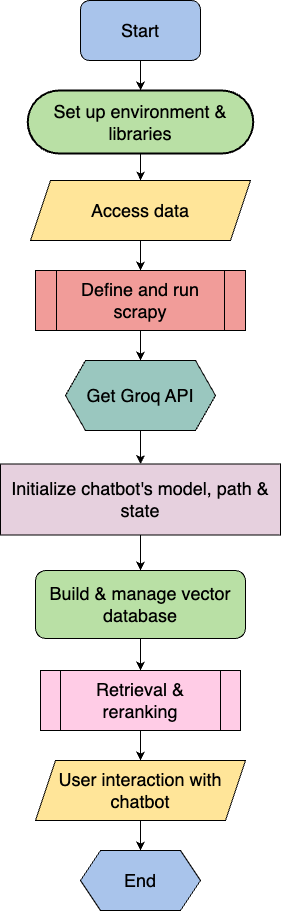

# <a name="Step-1"></a> 📦 Step 1: Installing Required Packages

In this step, we will install the Python libraries necessary for building the TEAM3 Chatbot, which is designed to assist with research-related queries using data from Papers with Code.



✅ Why Is This Important?

- Installing dependencies ensures that all required tools, such as langchain for AI workflows, faiss-cpu for vector search, and sentence-transformers for text embeddings, are available in the Google Colab environment.

- This step prepares the notebook for seamless execution of subsequent code cells.

- Using !pip install in Colab allows us to set up a fresh environment without manual configuration.

In [1]:
# Cell 1: Install required packages
# This cell installs the necessary Python packages for the chatbot
!pip install langchain faiss-cpu sentence-transformers requests langchain-groq numpy pandas ipywidgets scrapy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 405.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# <a name="Step-1"></a> 📚 Step 2: Importing Libraries

Here, we import the libraries installed in the previous step to enable functionalities like web requests, vector search, text processing, and interactive widgets in the chatbot.



✅ Why Is This Important?





- Importing libraries like langchain, faiss, and sentence_transformers provides the building blocks for the chatbot’s AI capabilities, vector database, and text embeddings.



- Libraries such as ipywidgets enable an interactive chat interface in Colab, mimicking a user-friendly UI.



- This step ensures all tools are ready for use in the chatbot’s logic and interface.


In [2]:
# Cell 2: Import libraries
# This cell imports all required libraries for the chatbot
import numpy as np
import pandas as pd
import os
from langchain.chat_models import init_chat_model
from langchain.schema import SystemMessage, HumanMessage, AIMessage
import faiss
from sentence_transformers import SentenceTransformer
from langchain.text_splitter import RecursiveCharacterTextSplitter
import time
import requests
import threading
import ipywidgets as widgets
from IPython.display import display, clear_output

# <a name="Step-3"></a> 🔑 Step 3: Accessing data from Google Drive
This step mounts Google Drive to read files directly without manual upload.

✅ Why Is This Important?

- google.colab.drive: Connects Colab to your Google Drive.



- Drive path: Files are accessible under /content/drive/My Drive/.


In [3]:
# Cell 3: Mount Google Drive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Confirm mounting (optional)
print("Google Drive mounted successfully!")

Mounted at /content/drive
Google Drive mounted successfully!


# <a name="Step-3"></a> 🕷️ Step 4: Defining the Scrapy Spider for Data Collection

In this step, we define a Scrapy spider (everything_spider.py) to crawl the Papers with Code website and extract research-related data, such as paper titles, abstracts, datasets, and models, which will be used to populate the chatbot’s knowledge base.



✅ Why Is This Important?





- The Scrapy spider automates the collection of structured data from Papers with Code, creating a dataset (e.g., paper_output.json) that serves as the foundation for the chatbot’s vector database and responses.



- By setting crawling limits (e.g., depth of 3 and 100 items), the spider ensures efficient data collection without overwhelming the website or the Colab environment.



- Extracting comprehensive metadata, including dataset names, model names, and paper details, enables the chatbot to provide accurate and context-rich answers to research-related queries.

In [4]:
# Cell 4: Define Scrapy Spider
# This cell creates everything_spider.py to crawl Papers with Code and extract research data.
  %%writefile everything_spider.py
  import scrapy

  class EverythingSpider(scrapy.Spider):
      name = "everything_spider"
      allowed_domains = ['paperswithcode.com']
      start_urls = ['https://paperswithcode.com']

      custom_settings = {
          'DEPTH_LIMIT': 3,  # Set depth limit to 3
          'CLOSESPIDER_ITEMCOUNT': 100  # Stop after 100 items
      }

      def parse(self, response):
          # Follow all links, relying on allowed_domains for filtering
          for href in response.css('a::attr(href)').getall():
              yield response.follow(href, callback=self.parse_paper)

      def parse_paper(self, response):
          # Extract data (existing code)
          title = response.css('h1::text').get()
          abstract = response.css('div.paper-abstract p::text').get()
          raw = response.css('div.authors span.author-span::text').getall()
          clean = [s.strip() for s in raw if s.strip()]
          date = clean[0] if clean else None
          authors = clean[1:] if len(clean) > 1 else []
          artefact_information = response.css('div.artefact-information p::text').getall()
          raw_parts_description = response.css('div.description p ::text').getall()
          description = ' '.join(part.strip() for part in raw_parts_description if part.strip())
          dataset_names = [name.strip() for name in response.css('div.sota-table-preview div.dataset a::text').getall()]
          best_model_names = [model.strip() for model in response.css('div.sota-table-preview tr td:nth-child(3) div.black-links a::text').getall() if model.strip()]
          dataset_links = [response.urljoin(link) for link in response.css('div.task-datasets a::attr(href)').getall()]
          paper_list_titles = [paper.strip() for paper in response.css('div#task-papers-list div.col-lg-9.item-content h1 a::text').getall()]
          paper_list_authors = [author.strip() for author in response.css('div#task-papers-list div.authors span.author-span::text').getall() if author.strip()]
          paper_list_title_links = [response.urljoin(link) for link in response.css('div#task-papers-list h1 a::attr(href)').getall()]
          paper_list_author_links = [response.urljoin(link) for link in response.css('div#task-papers-list span.item-github-link a::attr(href)').getall()]
          benchmark_dataset_links = [response.urljoin(link) for link in response.css('div.sota-table-preview div.dataset a::attr(href)').getall()]
          paper_list_dates = [date.strip() for date in response.css('div#task-papers-list div.col-lg-9.item-content span.item-date-pub::text').getall()]
          paper_list_abstracts = [abstract.strip() for abstract in response.css('div#task-papers-list div.col-lg-9.item-content p.item-strip-abstract::text').getall()]

          # Yield extracted data
          yield {
              "url": response.url,
              "title": title,
              "abstract": abstract,
              "date": date,
              "authors": authors,
              "artefact-information": artefact_information,
              "description": description,
              "benchmark_dataset_links": benchmark_dataset_links,
              "dataset_names": dataset_names,
              "best_model_names": best_model_names,
              "dataset_links": dataset_links,
              "paper_list_titles": paper_list_titles,
              "paper_list_title_links": paper_list_title_links,
              "paper_list_authors": paper_list_authors,
              "paper_list_author_links": paper_list_author_links,
              "paper_list_dates": paper_list_dates,
              "paper_list_abstracts": paper_list_abstracts
          }


          # Follow links from this page to continue crawling
          for href in response.css('a::attr(href)').getall():
              yield response.follow(href, callback=self.parse_paper)

Writing everything_spider.py


# <a name="Step-3"></a> 🕸️ Step 5: Running the Scrapy Spider to Collect Data

In this step, we execute the Scrapy spider defined in everything_spider.py to crawl the Papers with Code website and save the extracted research data to paperoutput.json, which will be used to build the chatbot’s knowledge base.



✅ Why Is This Important?





- Running the spider collects structured data (e.g., paper titles, abstracts, datasets, and models) from Papers with Code, creating a JSON file (paperoutput.json) essential for the chatbot’s vector database and query responses.



- The -o paperoutput.json flag ensures the scraped data is saved in a format that can be processed by subsequent steps, such as chunking and indexing.



- This step bridges the data collection phase with the chatbot’s functionality, enabling research-focused answers based on real-world data.

In [5]:
# Cell 5: Run Scrapy Spider
# This cell executes the Scrapy spider to crawl Papers with Code and save research data to paperoutput.json.
!scrapy runspider everything_spider.py -o paperoutput.json

Streaming output truncated to the last 5000 lines.
2025-05-03 22:10:56 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 3): https://paperswithcode.com/datasets?task=text-classification&lang=chinese&page=1 
2025-05-03 22:10:56 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 3): https://paperswithcode.com/datasets?task=translation&lang=chinese&page=1 
2025-05-03 22:10:56 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 3): https://paperswithcode.com/datasets?task=visual-question-answering-1&lang=chinese&page=1 
2025-05-03 22:10:56 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 3): https://paperswithcode.com/datasets?task=word-embeddings&lang=chinese&page=1 
2025-05-03 22:10:56 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 3): https://paperswithcode.com/datasets?task=arithmetic-reasoning&lang=chinese&page=1 
2025-05-03 22:10:56 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 3): https://paperswithco

# <a name="Step-3"></a> 🧠 Step 6: Setting up API key

In this step, we check for the presence of the Groq API key to initialize the chatbot environment.



✅ Why Is This Important?



- Checking the API key ensures that the chatbot can communicate with the Groq API for AI responses.

In [6]:
# Cell 6: Set Up API Key (Manual Input in Colab)
api_key = input("Please enter your GROQ_API_KEY: ")
os.environ["GROQ_API_KEY"] = api_key

if not api_key:
    raise ValueError("GROQ_API_KEY is not set.")


Please enter your GROQ_API_KEY: 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


# <a name="Step-3"></a> 🤖 Step 7: Initializing Chat Model and Session State

This step initializes the chat model using the Groq API and sets up a session state dictionary to manage conversation history and response tracking.



✅ Why Is This Important?





- Initializing the llama3-8b-8192 model via langchain enables the chatbot to generate AI-powered responses.



- The session state dictionary mimics Streamlit’s session management, storing messages, question timestamps, and response times for a persistent chat experience.



- The system message defines the chatbot’s role and behavior, ensuring responses are research-focused and concise.

In [7]:
# Cell 7: Initialize Chat Model and Session State
# This cell initializes the chat model and session state dictionary
# Initialize the Chat Model
chat = init_chat_model("llama3-8b-8192", model_provider="groq")

# Initialize Session State (using a dictionary to mimic Streamlit's session_state)
session_state = {
    "messages": [
        SystemMessage(content="""
        You are an expert research assistant.
        You are designed to help users with questions related to research papers, methodologies, benchmarks, datasets, models, and advancements, based on information from Papers with Code.

        Rules & Restrictions:
        - **Stay on Topic:** Only respond to questions related to research, including models, datasets, benchmarks, research papers, and machine learning techniques.
        - **No Negative Responses:** Maintain a factual, supportive, and encouraging tone at all times.
        - **Support and Guide:** Provide clear, concise, and precise responses focused on research.
        - **No Controversial Discussions:** Avoid unrelated topics such as politics, ethics debates, or opinions outside of research.
        - **Keep Responses Concise:** Limit answers to 2-3 sentences to ensure clarity, focus, and academic professionalism.

        Provide a concise and accurate answer based solely on the context below.
        If the context does not contain enough information to answer the question, respond with "I don't have enough information to answer this question." Do not generate, assume, or fabricate any details beyond the given context.
        """)
    ],
    "conversation_history": [],
    "question_times": [],
    "response_times": {}
}

# <a name="Step-3"></a> 🔄 Step 8: Defining Data Processing Functions

In this step, we define functions to process research data, including creating text chunks from a JSON dataset and building a FAISS vector database for efficient retrieval.



✅ Why Is This Important?





- The create_chunks function processes research data into manageable text segments, enabling precise retrieval.



- The create_vector_database function builds a FAISS index from text embeddings, supporting fast similarity search.



- The load_existing_index function ensures the vector database is loaded efficiently, with background processing for new indices.

In [8]:
# Cell 8: Data Processing Functions
# This cell defines functions to create text chunks and the FAISS vector database
faiss_index_file_path = "/content/faiss_index.index"
chunks_file_path = "/content/chunks.txt"
model = None
index = None
chunks = []

# Initialize SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')
def create_chunks(output_file_path="/content/paperoutput.json"):
    global chunks, index, model
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=50)
    chunks = []

    try:
        df = pd.read_json(output_file_path)
    except FileNotFoundError:
        print("Warning: paperoutput.json not found.")
        return []

    for _, row in df.iterrows():
        # 1. Dataset–Model Pairs
        datasets = row.get('dataset_names', [])
        models = row.get('best_model_names', [])
        dataset_links = row.get('dataset_links', [])

        for i in range(min(len(datasets), len(models))):
            dataset_text = f"Dataset: {datasets[i]}, Best Model: {models[i]}"
            if i < len(dataset_links):
                dataset_text += f", Dataset Link: {dataset_links[i]}"
            chunks.append(dataset_text)

        # 2. Main Metadata
        title = row.get('title')
        title = title.strip() if isinstance(title, str) else ''

        main_text = " ".join(filter(None, [
            f"Title: {title}",
            f"Abstract: {row.get('abstract') or ''}",
            f"Description: {row.get('description') or ''}",
            f"URL: {row.get('url') or ''}",
            f"Date: {row.get('date') or ''}",
            f"Authors: {', '.join(row.get('authors', []))}",
            f"Artefacts: {', '.join(row.get('artefact-information', []))}"
        ]))

        chunks.extend(text_splitter.split_text(main_text))

        # 3. Paper List Entries
        paper_titles = row.get('paper_list_titles', [])
        paper_abstracts = row.get('paper_list_abstracts', [])
        paper_authors = row.get('paper_list_authors', [])
        paper_dates = row.get('paper_list_dates', [])
        paper_links = row.get('paper_list_title_links', [])
        author_links = row.get('paper_list_author_links', [])

        for i in range(len(paper_titles)):
            paper_text = " ".join(filter(None, [
                f"Paper Title: {paper_titles[i]}",
                f"Link: {paper_links[i]}" if i < len(paper_links) else "",
                f"Abstract: {paper_abstracts[i]}" if i < len(paper_abstracts) else "",
                f"Authors: {paper_authors[i]}" if i < len(paper_authors) else "",
                f"Author Links: {author_links[i]}" if i < len(author_links) else "",
                f"Date: {paper_dates[i]}" if i < len(paper_dates) else ""
            ]))
            chunks.extend(text_splitter.split_text(paper_text))

    # Save chunks to file
    with open(chunks_file_path, 'w') as f:
        for chunk in chunks:
            f.write(chunk + '\n')
    return chunks

def create_vector_database():
    """
    Create a vector database using FAISS by encoding chunks of text.
    """
    global model, index, chunks
    if not chunks:
        print("No chunks available to create vector database.")
        return
    embeddings = model.encode(chunks).astype('float32')
    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)
    faiss.write_index(index, faiss_index_file_path)
    print("Created and saved FAISS index.")

def load_existing_index():
    """
    Load an existing FAISS index or create a new one in the background.
    """
    global index
    if os.path.exists(faiss_index_file_path):
        index = faiss.read_index(faiss_index_file_path)
        print("Loaded existing FAISS index.")
    else:
        print("No index found, building in background...")
        thread = threading.Thread(target=create_vector_database)
        thread.start()

load_existing_index()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

No index found, building in background...
No chunks available to create vector database.


# <a name="Step-3"></a> 🗄️ Step 9: Setting Up Vector Database Variables

This step initializes variables and file paths for the vector database, loading existing chunks and FAISS index if available, to support similarity search for research data.



✅ Why Is This Important?





- The vector database, powered by FAISS, enables efficient similarity search to retrieve relevant research data for user queries.



- Loading pre-existing chunks and indices avoids redundant processing, improving performance.



- The SentenceTransformer model is initialized to generate embeddings, critical for vector-based retrieval.

In [9]:
# Cell 9: Initialize Vector Database Variables
# This cell sets up file paths and initializes variables for the vector database
# File paths (adjust for Colab environment)

# Load chunks (assuming chunks.txt is available in Colab)
if os.path.exists(faiss_index_file_path):
  try:
      with open(chunks_file_path, 'r') as f:
          for line in f:
              chunks.append(line.strip())
  except FileNotFoundError:
      print("Warning: chunks.txt not found. Vector search will be limited.")
else:
  create_chunks()

# Load FAISS index
if os.path.exists(faiss_index_file_path):
  try:
      index = faiss.read_index(faiss_index_file_path)
  except FileNotFoundError:
      print("Warning: faiss_index.index not found. Vector search will be limited.")
else:
  create_vector_database()

Created and saved FAISS index.


# <a name="Step-3"></a> 🧠 Step 10: Implementing Chatbot Logic

This step defines the core logic for the chatbot, including rate limiting, retrieving similar sentences using the vector database, and reranking results for relevance.



✅ Why Is This Important?





- The check_rate_limit function prevents abuse by limiting users to 10 questions per minute.



- The retrieve_similar_sentences function uses FAISS to find text chunks relevant to the user’s query, enhancing response accuracy.



- The rerank_sentences function leverages the LLM to rank retrieved sentences, ensuring the most relevant context is used.

In [10]:
# Cell 10: Chatbot Logic Functions
# This cell defines functions for rate limiting, sentence retrieval, and reranking
def check_rate_limit():
    """
    Check if the user has exceeded 10 questions in the last 60 seconds.
    """
    current_time = time.time()
    session_state["question_times"] = [t for t in session_state["question_times"] if current_time - t < 60]
    if len(session_state["question_times"]) >= 10:
        return False, "You've reached the limit of 10 questions per minute. Please try again in 3 minutes."
    return True, None

def retrieve_similar_sentences(query_sentence, k):
    """Retrieve top-k similar sentences from the corpus."""
    if index is None or not chunks:
        return [], []
    query_embedding = model.encode(query_sentence).astype('float32').reshape(1, -1)
    distances, indices = index.search(query_embedding, k)
    similar_sentences = [chunks[indices[0][i]] for i in range(min(k, len(indices[0])))]
    return similar_sentences, distances[0].tolist()

def rerank_sentences(query, sentences):
    """
    Use LLM to re-rank retrieved sentences based on relevance to the query.
    """
    if not sentences:
        return []
    rerank_prompt = (
        "You are an AI tasked with ranking sentences based on their relevance to a query. "
        "For each sentence, provide a relevance score between 0 and 1 (where 1 is highly relevant) "
        "and a brief explanation. Return the results in this format exactly, do not bold the words:\n"
        "Sentence: <sentence>\nScore: <score>\nExplanation: <explanation>\n\n"
        "Query: '{}'\n\n"
        "Sentences to rank:\n{}"
    ).format(query, "\n".join([f"{i+1}. {s}" for i, s in enumerate(sentences)]))

    max_retries = 3
    retry_delay = 60

    for attempt in range(max_retries):
        try:
            response = chat.invoke([HumanMessage(content=rerank_prompt)])
            reranked = []
            lines = response.content.strip().split("\n")
            for i in range(0, len(lines), 3):
                try:
                    sentence = lines[i].replace("Sentence: ", "").strip()
                    score = float(lines[i+1].replace("Score: ", "").strip())
                    reranked.append((sentence, score))
                except (IndexError, ValueError):
                    continue
            reranked.sort(key=lambda x: x[1], reverse=True)
            return reranked
        except Exception as e:
            if "Error code: 413" in str(e) and "rate_limit_exceeded" in str(e):
                if attempt < max_retries - 1:
                    print(f"Rate limit exceeded. Waiting {retry_delay} seconds... (Attempt {attempt + 1}/{max_retries})")
                    time.sleep(retry_delay)
                    continue
            raise e
    return []

# <a name="Step-3"></a> 💬 Step 11: Building the Interactive Chat Interface

This step creates an interactive chat interface using IPython widgets, allowing users to input research questions and receive responses in a Colab notebook.



✅ Why Is This Important?





- The interactive interface, built with ipywidgets, provides a user-friendly way to interact with the chatbot in Colab, replacing Streamlit’s UI.



- The interface handles user input, displays chat history, and integrates the chatbot’s logic to deliver responses with response times.



- This step completes the chatbot by enabling real-time user interaction and feedback.

In [11]:
# Cell 11: Interactive Chat Interface
# This cell sets up the interactive chat interface using IPython widgets
# Create input widget for user queries
query_input = widgets.Text(
    value='',
    placeholder='Type your question here...',
    description='Question:',
    layout={'width': '600px'}
)

# Create output widget for displaying chat history
output = widgets.Output()

# Create submit button
submit_button = widgets.Button(
    description='Submit',
    button_style='primary',
    tooltip='Submit question',
    layout={'width': '100px'}
)

def on_submit_button_clicked(b):
    with output:
        clear_output()
        user_input = query_input.value.strip()
        if not user_input:
            print("Please enter your question.")
            return

        can_ask, error_message = check_rate_limit()
        if not can_ask:
            print(error_message)
            return

        session_state["question_times"].append(time.time())
        session_state["messages"].append(HumanMessage(content=user_input))

        print(f"User: {user_input}")
        print("Assistant: Thinking...")

        start_time = time.time()
        similar_sentences, _ = retrieve_similar_sentences(user_input, k=10)
        if not similar_sentences:
            context = "No context available."
        else:
            reranked = rerank_sentences(user_input, similar_sentences)
            threshold = 0.3
            if reranked and reranked[-1][1] < threshold:
                context = "Not enough context available."
            else:
                context = reranked[-1][0] if reranked else "No context available."

        messages_to_send = session_state["messages"] + [
            SystemMessage(content=f"Context: {context}\n\nYou MUST respond with a concise answer limited to one paragraph.")
        ]
        response = chat.invoke(messages_to_send)
        ai_message = AIMessage(content=response.content)

        end_time = time.time()
        response_time = end_time - start_time
        session_state["response_times"][response.content] = response_time
        session_state["messages"].append(ai_message)

        print(f"Assistant: {response.content}")
        print(f"Response time: {response_time:.2f} seconds")

        query_input.value = ''  # Clear input field

submit_button.on_click(on_submit_button_clicked)

# Display chat interface
display(query_input, submit_button, output)

# Instructions for user
print("Instructions: Enter your research-related question in the text box above and click 'Submit'. The chatbot will respond with a concise answer based on Papers with Code data.")

Text(value='', description='Question:', layout=Layout(width='600px'), placeholder='Type your question here...'…

Button(button_style='primary', description='Submit', layout=Layout(width='100px'), style=ButtonStyle(), toolti…

Output()

Instructions: Enter your research-related question in the text box above and click 'Submit'. The chatbot will respond with a concise answer based on Papers with Code data.
